# **Task 3.3.** Temporal Difference Learning (TD-Learning)

## **(a)** TD(0) Prediction for State-Value

In [1]:
import gymnasium as gym
import numpy as np

In [2]:
def td_prediction(env, gamma=0.99, alpha=0.01, num_episodes=1000, num_steps=100):

    V = np.zeros(env.observation_space.n)

    for episode in range(num_episodes):
        state = env.reset()[0]

        for step in range(num_steps):
            done = False
            while not done:
                action = env.action_space.sample()       
                next_state, reward, done, _, _ = env.step(action)
                V[state] += alpha * (reward + gamma * V[next_state] - V[state])
                state = next_state
    return V


In [ ]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
env.reset()
 
V = td_prediction(env)    

Estimated state values:
[5.34580515e-05 3.63089091e-05 9.35719151e-05 1.16026753e-05
 8.44544571e-05 0.00000000e+00 4.11379508e-04 0.00000000e+00
 3.22229182e-04 1.62018832e-03 5.67152051e-03 0.00000000e+00
 0.00000000e+00 7.80644133e-03 1.03479758e-01 0.00000000e+00]


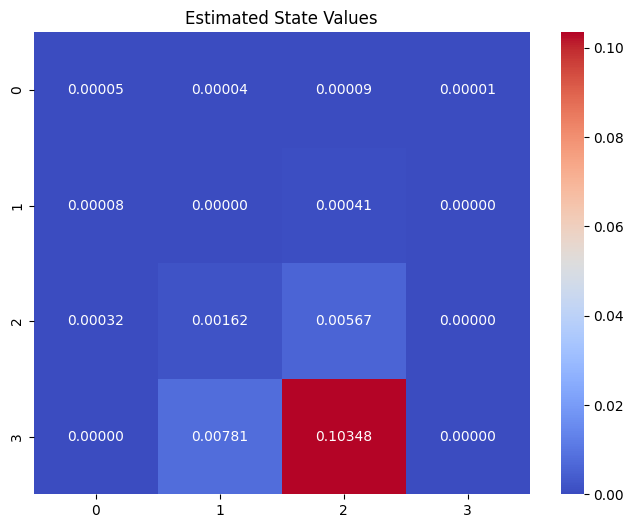

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


grid_size = int(np.sqrt(len(V))) 
V_grid = V.reshape((grid_size, grid_size))


plt.figure(figsize=(8, 6))
sns.heatmap(V_grid, annot=True, cmap="coolwarm", cbar=True, fmt=".5f")
plt.title("Estimated State Values")
plt.show()

## **(b)** SARSA (on-policy TD control)

In [ ]:
def epsilon_greedy(Q, epsilon, state):
    if np.random.rand() < epsilon: 
        return env.action_space.sample()
    else:
        return np.argmax(Q[state])

In [ ]:
def td_control(env, num_episodes=10000, alpha=0.1, gamma=0.99, epsilon=0.2, max_steps=100):
    
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    episode_rewards = []

    for episode in range(num_episodes):
            
            state = env.reset()[0]
            episode_reward = 0

            for step in range(max_steps):
                action = epsilon_greedy(Q, epsilon, state)
                done = False

                while not done:   

                    next_state, reward, done, _, _ = env.step(action)
                    next_action = epsilon_greedy(Q, epsilon, next_state)
                    Q[state, action] += alpha * (reward + (gamma * Q[next_state, next_action] - Q[state, action]))
                    episode_reward += reward 
                
                    state, action = next_state, next_action

            episode_rewards.append(episode_reward)

            avg_cum_reward = np.cumsum(episode_rewards)/len(episode_rewards)

    return avg_cum_reward

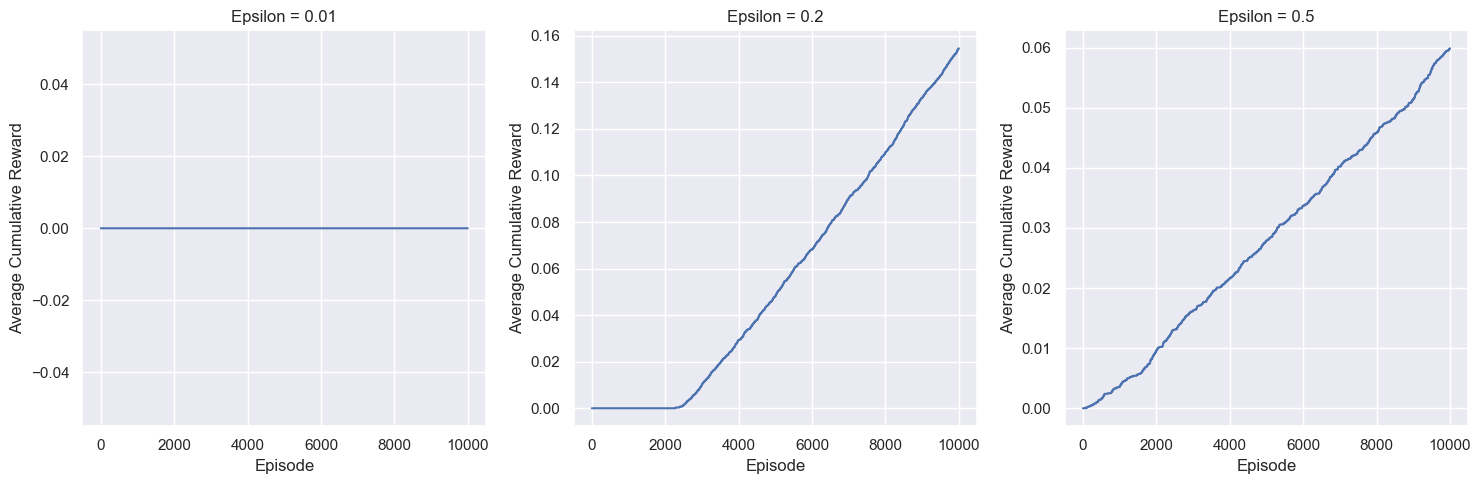

In [ ]:
epsilons = [0.01, 0.2, 0.5]

plt.figure(figsize=(15, 5))
sns.set_theme()

for i, epsilon in enumerate(epsilons):
    plt.subplot(1, 3, i + 1)
    avg_cum_reward = td_control(env, epsilon = epsilon)
    sns.lineplot(avg_cum_reward)
    plt.title(f"Epsilon = {epsilon}")
    plt.xlabel('Episode')
    plt.ylabel('Average Cumulative Reward')

plt.tight_layout()
plt.show()